<a href="https://colab.research.google.com/github/shahriar-ehteshami/FiberVision-AI/blob/main/MyDLNote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basics of Tensors

indexing Tensor

In [ ]:
import torch

x = torch.rand((3,5))

print(x)
print(x.ndimension())
print(x.numel())


tensor([[0.6277, 0.1887, 0.6485, 0.1997, 0.3179],
        [0.5536, 0.9942, 0.5412, 0.4753, 0.4432],
        [0.7267, 0.3966, 0.2114, 0.6970, 0.6960]])
2
15


In [ ]:
rows = torch.tensor([1,0])
cols = torch.tensor([4,0])

print(x[rows, cols])

print(x[((x>0.5) & (x<0.7))])

tensor([0.4432, 0.6277])
tensor([0.6277, 0.6485, 0.5536, 0.5412, 0.6970, 0.6960])


In [ ]:
x = torch.arange(10)
print(x[(x.remainder(2) == 0)])

print(torch.where(x>5, x, 2))

print(torch.where((x.remainder(2) == 0), x, x*2))


tensor([0, 2, 4, 6, 8])
tensor([2, 2, 2, 2, 2, 2, 6, 7, 8, 9])
tensor([ 0,  2,  2,  6,  4, 10,  6, 14,  8, 18])


reshaping Tensor

In [ ]:
x = torch.arange(9)
print(x)
# x = x.view(3,3)
x = x.reshape(3,3)
print(x)
print(x.t()) # transpose
print(x.t().reshape(1,9)) # transpose

x1 = torch.rand((2,5))
x2 = torch.rand((2,5))
print(torch.cat((x1, x2), dim=0).shape)
print(torch.cat((x1, x2), dim=1).shape)

z = x1.view(-1)
print(z.shape)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])
tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
tensor([[0, 3, 6],
        [1, 4, 7],
        [2, 5, 8]])
tensor([[0, 3, 6, 1, 4, 7, 2, 5, 8]])
torch.Size([4, 5])
torch.Size([2, 10])
torch.Size([10])


In [ ]:
batch = 64
x = torch.rand((batch, 2, 5))
print(x.shape)

z = x.view(batch, -1)
print(z.shape)

z = x.permute(0,2,1)
print(z.shape)
# transpose is special case of permute

x = torch.arange(10)
print(x)
print(x.shape)
print(x.unsqueeze(0).shape)
print(x.unsqueeze(1).shape)

z = x.unsqueeze(0).unsqueeze(1)
print(z)
z = z.squeeze(1)
print(z)

torch.Size([64, 2, 5])
torch.Size([64, 10])
torch.Size([64, 5, 2])
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
torch.Size([10])
torch.Size([1, 10])
torch.Size([10, 1])
tensor([[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]])
tensor([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])


# MINST

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

Load the MNIST Dataset

In [ ]:
# Transform images to tensors and normalize (0 mean, 1 std)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Training and test datasets
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Data loaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


100%|██████████| 9.91M/9.91M [00:01<00:00, 6.04MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 160kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.51MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.60MB/s]


Define the Neural Network

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 16, 3, padding=1),  # 1 input channel (grayscale), 16 filters
            nn.ReLU(),
            nn.MaxPool2d(2),  # Downsample by 2x
            nn.Conv2d(16, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(32 * 7 * 7, 128),
            nn.ReLU(),
            nn.Linear(128, 10)  # 10 output classes for digits 0–9
        )

    def forward(self, x):
        return self.net(x)


Initialize Model, Loss, and Optimizer

In [ ]:
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


Train the Model

In [ ]:
def save_checkpoint(state, filename="my_checkpoint.pth.tar"):
  print("=> saving checkpoint!")
  torch.save(state, filename)

def load_checkpoint(checkpoint):
  print("=> loading checkpoint!")
  model.load_state_dict(checkpoint["state_dict"])
  optimizer.load_state_dict(checkpoint["optimizer"])

load_model = True
if load_model:
  load_checkpoint(torch.load("my_checkpoint.pth.tar"))



epochs = 5
for epoch in range(epochs):
    running_loss = 0.0

    # losses = []
    # if epoch == 2:
    #   checkpoint = {'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict()}
    #   save_checkpoint(checkpoint)

    for images, labels in trainloader:
        optimizer.zero_grad()       # Reset gradients
        outputs = model(images)     # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()             # Backward pass
        optimizer.step()            # Update weights

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader):.4f}")


=> loading checkpoint!
Epoch 1, Loss: 0.0380
Epoch 2, Loss: 0.0280
Epoch 3, Loss: 0.0215
Epoch 4, Loss: 0.0173
Epoch 5, Loss: 0.0130


Test the Model

In [ ]:
correct = 0
total = 0
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Get class with highest score
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")


Test Accuracy: 99.02%


Test a Single Image

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

In [ ]:
# Load image
img = Image.open("./sample_data/test_image7.png").convert('L')  # convert to grayscale

# Invert if your image is black on white
import PIL
img = PIL.ImageOps.invert(img)


# Display the image
plt.imshow(img, cmap="gray")
plt.title("Input Image")
plt.axis("off")
plt.show()

transform = transforms.Compose([
    transforms.Resize((28, 28)),       # Ensure correct size
    transforms.ToTensor(),             # Convert to tensor
    transforms.Normalize((0.5,), (0.5,))
])

img_tensor = transform(img).unsqueeze(0)  # Add batch dimension => shape: [1, 1, 28, 28]
# print(img_tensor)

model.eval()
with torch.no_grad():
    output = model(img_tensor)
    _, predicted = torch.max(output, 1)
    print(f"Predicted Digit: {predicted.item()}")

NameError: name 'Image' is not defined

MNIST pytorch toturial

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

# Simple neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train
for epoch in range(5):
    model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/5], Loss: {loss.item():.4f}")

# Test
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")


100%|██████████| 9.91M/9.91M [00:00<00:00, 13.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 427kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.23MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.78MB/s]


Epoch [1/5], Loss: 0.2141
Epoch [2/5], Loss: 0.0785
Epoch [3/5], Loss: 0.2006
Epoch [4/5], Loss: 0.0737
Epoch [5/5], Loss: 0.0582
Test Accuracy: 97.57%


Saved sample.png with label 1


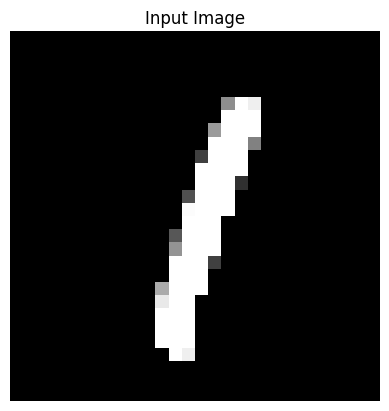

Predicted Digit: 1


In [ ]:
from torchvision.utils import save_image

# Save a sample image from the test set
sample_image, sample_label = test_dataset[5]
save_image(sample_image, 'sample.png')
print(f"Saved sample.png with label {sample_label}")


from PIL import Image
import torchvision.transforms as transforms

# Load the trained model (skip if already loaded)
model.eval()

# Define the transform (same as training)
transform = transforms.Compose([
    transforms.Grayscale(),                   # Ensure 1 channel
    transforms.Resize((28, 28)),              # Resize to 28x28
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load and preprocess the image
img = Image.open('sample.png')

# Display the image
import matplotlib.pyplot as plt
plt.imshow(img, cmap="gray")
plt.title("Input Image")
plt.axis("off")
plt.show()

img_tensor = transform(img).unsqueeze(0).to(device)  # Add batch dimension

# Predict
with torch.no_grad():
    output = model(img_tensor)
    predicted = torch.argmax(output, dim=1)
    print(f"Predicted Digit: {predicted.item()}")


MNIST fully connected NN

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader


# create fully connected neural network class
class NN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(input_size, 50)  # input layer
        # self.fc2 = nn.Linear(128, 64)       # hidden layer
        self.fc2 = nn.Linear(50, num_classes)        # output layer

    def forward(self, x):
        # x = x.view(-1, 28 * 28)  # flatten the input
        x = F.relu(self.fc1(x))  # activation function
        # x = F.relu(self.fc2(x))
        x = self.fc2(x)
        return x


# model = NN(input_size=784, num_classes=10)  # create model
# x = torch.randn(64, 784)  # create random input
# y = model(x)  # forward pass
# print(y.shape)  # print output shape
# print(y)  # print output

# set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyperparameters
input_size = 784
num_classes = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 1

# load data
train_dataset = datasets.MNIST(root='dataset/', train=True, download=True,transform=transforms.ToTensor())
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = datasets.MNIST(root='dataset/', train=False, download=True,transform=transforms.ToTensor())
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# initialize network
model = NN(input_size=input_size, num_classes=num_classes).to(device)  # create model

# loss and optimizer
criterion = nn.CrossEntropyLoss()  # loss function
optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # optimizer

# train network
for epoch in range(num_epochs):
    for batch_idx, (data, targets) in enumerate(train_loader):
        data = data.to(device=device)
        targets = targets.to(device=device)

        # if(batch_idx == 3):
        #   print(data.shape)

        data = data.reshape(data.shape[0], -1)

        # if(batch_idx == 3):
        #   print(data.shape)

        # forward
        scores = model(data)
        if(batch_idx == 3):
          print(scores.shape)
          print(targets.shape)
        loss = criterion(scores, targets)

        # backward
        optimizer.zero_grad()
        loss.backward()

        # gradient descent or adam step
        optimizer.step()



100%|██████████| 9.91M/9.91M [00:00<00:00, 51.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.73MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 12.8MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.16MB/s]


torch.Size([64, 10])
torch.Size([64])


In [ ]:
# test
def check_accuracy(loader, model):
  num_correct = 0
  num_samples = 0
  model.eval()

  with torch.no_grad():
    for x, y in loader:
      x = x.to(device=device)
      y = y.to(device=device)
      x = x.reshape(x.shape[0], -1)

      scores = model(x)
      _, predictions = scores.max(1)
      num_correct += (predictions==y).sum()
      num_samples += predictions.size(0)

    accuracy = (float(num_correct)/float(num_samples))*100
    print("num_correct: ", num_correct)
    print("num_samples: ", num_samples)
    print("accuracy:", accuracy)

  model.train()
  return accuracy

print(check_accuracy(train_loader, model))
print(check_accuracy(test_loader, model))

num_correct:  tensor(55922)
num_samples:  60000
accuracy: 93.20333333333333
93.20333333333333
num_correct:  tensor(9320)
num_samples:  10000
accuracy: 93.2
93.2


# Edge Detection

Sobel filter

In [ ]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
from PIL import Image


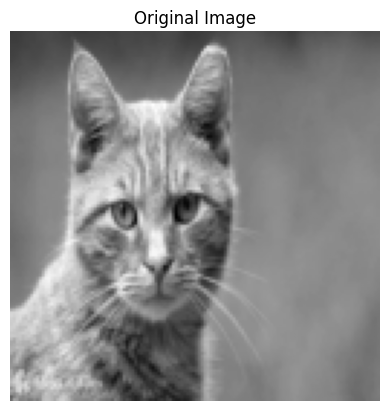

In [ ]:
img = Image.open("./FELV-cat.jpg").convert("L")  # convert to grayscale

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])
img_tensor = transform(img).unsqueeze(0)  # [1, 1, H, W]

plt.imshow(img_tensor.squeeze().numpy(), cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.show()


define Sobel filter

In [ ]:
sobel_x = torch.tensor([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]], dtype=torch.float32)

sobel_y = torch.tensor([[-1, -2, -1],
                        [ 0,  0,  0],
                        [ 1,  2,  1]], dtype=torch.float32)

# Reshape to [out_channels, in_channels, H, W]
sobel_x = sobel_x.view(1, 1, 3, 3)
sobel_y = sobel_y.view(1, 1, 3, 3)


apply convolution

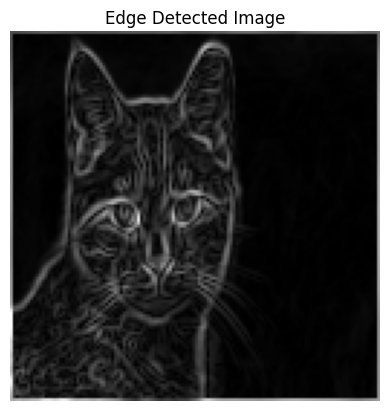

In [ ]:
edge_x = torch.nn.functional.conv2d(img_tensor, sobel_x, padding=1)
edge_y = torch.nn.functional.conv2d(img_tensor, sobel_y, padding=1)

# Combine gradients
edges = torch.sqrt(edge_x ** 2 + edge_y ** 2)

# Normalize for visualization
edges = (edges - edges.min()) / (edges.max() - edges.min())

plt.imshow(edges.squeeze().detach().numpy(), cmap='gray')
plt.title("Edge Detected Image")
plt.axis("off")
plt.show()


CNN Edge Detection

# TransferLearning & FineTuning

In [4]:
# Imports
import torch
import torchvision
import torch.nn.functional as F  # Parameterless functions, like (some) activation functions
import torchvision.datasets as datasets  # Standard datasets
import torchvision.transforms as transforms  # Transformations we can perform on our dataset for augmentation
from torch import optim  # For optimizers like SGD, Adam, etc.
from torch import nn  # All neural network modules
from torch.utils.data import (
    DataLoader,
)  # Gives easier dataset managment by creating mini batches etc.
from tqdm import tqdm  # For nice progress bar!
import sys


In [ ]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
in_channels = 3
num_classes = 10
learning_rate = 1e-3 # karpathy's constant
batch_size = 1024
num_epochs = 1

class Identity(nn.Module):
  def __init__(self):
    super(Identity, self).__init__()

  def forward(self, x):
    return x


model = torchvision.models.vgg16(pretrained=True)
for param in model.parameters():
  param.requires_grad = False
# for param in model.features[24:].parameters():  # last conv block
#     param.requires_grad = True

# model.avgpool = Identity()
# model.classifier = nn.Linear(512, 10)
# model.classifier = torch.nn.Sequential(
#     nn.Linear(512, 100),
#     nn.ReLU(),
#     nn.Linear(100, 10))
# model.classifier = nn.Sequential(
#     nn.Linear(25088, 4096),
#     nn.ReLU(True),
#     nn.Dropout(),
#     nn.Linear(4096, 1024),
#     nn.ReLU(True),
#     nn.Dropout(),
#     nn.Linear(1024, 10)
# )
model.classifier = nn.Sequential(
    nn.Flatten(),
    nn.Linear(512*7*7, 100),
    nn.ReLU(),
    nn.Linear(100, 10)
)

print(model)

model.to(device)

# sys.exit()

# Load Data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])
# transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
#                          std=[0.2023, 0.1994, 0.2010])
# ])


train_dataset = datasets.CIFAR10(
    root="dataset/", train=True, transform=transform, download=True
)
test_dataset = datasets.CIFAR10(
    root="dataset/", train=False, transform=transform, download=True
)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

# # Initialize network
# model = CNN(in_channels=in_channels, num_classes=num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train Network
for epoch in range(num_epochs):
    for batch_idx, (data, targets) in enumerate(tqdm(train_loader)):
        # Get data to cuda if possible
        data = data.to(device=device)
        targets = targets.to(device=device)

        # forward
        scores = model(data)
        loss = criterion(scores, targets)

        # backward
        optimizer.zero_grad()
        loss.backward()

        # gradient descent or adam step
        optimizer.step()

# Check accuracy on training & test to see how good our model
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()

    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)

            scores = model(x)
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)

    model.train()
    return num_correct / num_samples


print(f"Accuracy on training set: {check_accuracy(train_loader, model)*100:.2f}")
print(f"Accuracy on test set: {check_accuracy(test_loader, model)*100:.2f}")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

  0%|          | 0/49 [00:00<?, ?it/s]

In [2]:
from PIL import Image
import torchvision.transforms as transforms
import torch

# Define transform (must match training)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                         std=[0.2023, 0.1994, 0.2010])
])

# Load image
image = Image.open("path/to/your/image.jpg").convert("RGB")
image = transform(image).unsqueeze(0).to(device)  # Add batch dimension

# Set model to evaluation mode
model.eval()
with torch.no_grad():
    output = model(image)
    _, predicted = torch.max(output, 1)

# CIFAR-10 classes
classes = ['plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

print(f"Predicted class: {classes[predicted.item()]}")


FileNotFoundError: [Errno 2] No such file or directory: 'path/to/your/image.jpg'